# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

# These might be helpful:
from iso3166 import countries

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv("./data/mission_launches.csv")

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
df_data.shape

(4324, 9)

In [5]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data[df_data.duplicated(subset=["Organisation", "Date", "Detail"])]


,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [9]:
#It seams that the Price column has a lot of missing values. 
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [10]:
#Most of them are from RVSN USSR launches.
df_data[df_data.Price.isna()].Organisation.value_counts().head(10)

Organisation
RVSN USSR           1775
General Dynamics     251
Arianespace          183
VKS RF               168
US Air Force         135
Boeing               129
Martin Marietta      105
CASC                  93
Lockheed              71
NASA                  54
Name: count, dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
df_data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis=1, inplace= True)

In [12]:
df_data = df_data[~df_data.duplicated(subset=["Organisation", "Date", "Detail"])]

In [13]:
df_data['Date'] = pd.to_datetime(df_data['Date'], errors='coerce')

In [14]:
df_data.Price = df_data.Price.fillna(0)
df_data.Price = df_data.Price.str.replace(",", "")
df_data.Price = df_data.Price.astype(float)
df_data.Price = df_data.Price.multiply(1000000)

In [15]:
df_data.head(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,"50,000,000.00",Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,"29,750,000.00",Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,"65,000,000.00",Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,"145,000,000.00",Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,"64,680,000.00",Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,Soyuz 2.1a | Progress MS-15,StatusActive,"48,500,000.00",Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China",2020-07-23 04:41:00+00:00,Long March 5 | Tianwen-1,StatusActive,NaN,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,Falcon 9 Block 5 | ANASIS-II,StatusActive,"50,000,000.00",Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,H-IIA 202 | Hope Mars Mission,StatusActive,"90,000,000.00",Success


## Descriptive Statistics

In [16]:
df_data.describe(include = 'all')

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4197,4323,4323,963.00,4323
unique,56,137,NaN,4278,2,NaN,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",NaN,Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,NaN,Success
freq,1777,235,NaN,6,3534,NaN,3878
mean,NaN,NaN,1987-12-21 17:24:06.476054272+00:00,NaN,NaN,"153,921,007.27",NaN
min,NaN,NaN,1957-10-04 19:28:00+00:00,NaN,NaN,"5,300,000.00",NaN
25%,NaN,NaN,1972-05-05 11:20:00+00:00,NaN,NaN,"40,000,000.00",NaN
50%,NaN,NaN,1985-01-23 19:58:00+00:00,NaN,NaN,"62,000,000.00",NaN
75%,NaN,NaN,2002-09-26 14:27:00+00:00,NaN,NaN,"164,000,000.00",NaN
max,NaN,NaN,2020-08-07 05:12:00+00:00,NaN,NaN,"5,000,000,000.00",NaN


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [17]:
top_20_organizations = df_data.groupby("Organisation").agg({"Mission_Status": pd.Series.count}).sort_values("Mission_Status").tail(20)
top_20_organizations

,Mission_Status
Organisation,
Kosmotras,22
ISAS,30
Sea Launch,36
ILS,46
Roscosmos,55
ISRO,76
Lockheed,79
Northrop,83
MHI,84


In [18]:
fig = px.bar(top_20_organizations, x="Mission_Status", y=top_20_organizations.index,
             title="Top 20 Organisations by Number of Missions Launched<br><sup>X in log format</sup>", color="Mission_Status", width=1200, height=600)
fig.update_layout(xaxis_title="Number of Missions",
                  yaxis_title="Organisation",
                  font={"size": 9})
fig.update_xaxes(type="log")
fig.show()

In [19]:
#Now let's to the same for the period after the fall of the USSR, in the end of 1991.
df_data_after_1992 = df_data[df_data["Date"]
                             >= "1992-01-01"]
top_20_organizations_after_1992 = df_data_after_1992.groupby("Organisation").agg(
    {"Mission_Status": pd.Series.count}).sort_values("Mission_Status").tail(20)

fig = px.bar(top_20_organizations_after_1992, x="Mission_Status", y=top_20_organizations_after_1992.index,
             title="Top 20 Organisations by Number of Missions Launched - After 1992", color="Mission_Status", width=1200, height=600)
fig.update_layout(xaxis_title="Number of Missions",
                  yaxis_title="Organisation",
                  font={"size": 9})
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [20]:
rocket_status_df = df_data.groupby("Rocket_Status").agg({"Detail": pd.Series.count})
rocket_status_df.rename(columns={"Detail": "Number of Rockets"}, inplace=True)

rocket_status_df = rocket_status_df.rename(index={"StatusActive": "Active", "StatusRetired": "Inactive"})

rocket_status_df

,Number of Rockets
Rocket_Status,
Active,789
Inactive,3534


In [21]:
fig = px.pie(rocket_status_df, values="Number of Rockets", names=rocket_status_df.index, color=rocket_status_df.index,
             title="Rockets Status<br><sup>Inactive X Active</sup>", width=800, height=600, hole=.5, color_discrete_map={"Active": "blue", "Inactive": "gray"})
fig.update_layout(font={"size": 16})
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [22]:
mission_status_df = df_data.groupby("Mission_Status").agg({"Rocket_Status": pd.Series.count})
mission_status_df

,Rocket_Status
Mission_Status,
Failure,339
Partial Failure,102
Prelaunch Failure,4
Success,3878


In [23]:
fig = px.pie(mission_status_df, values="Rocket_Status", names=mission_status_df.index, color=mission_status_df.index, title="Distribution of Mission Status",
             width=800, height=600, hole=.5, color_discrete_map={"Success": "green", "Failure": "red", "Partial Failure": "orange", "Prelaunch Failure": "yellow"})
fig.update_layout(font={"size": 16})
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [24]:
price_series = df_data.Price.dropna()

In [25]:
fig = px.histogram(price_series, title="Price Histogram of the Launches", width=1200, height=600, nbins=30)
fig.update_layout(xaxis_title="Investment",
                  yaxis_title="Number of Launches",
                  font={"size": 11})
fig.show()


In [26]:
#Now let's filter the outliers.
filtered_price_series = price_series.copy()

q75 = filtered_price_series.quantile(0.75)
q25 = filtered_price_series.quantile(0.25)
iqr = q75 - q25

filtered_price_series = filtered_price_series[filtered_price_series < (iqr)*1.5+q75]

fig = px.histogram(filtered_price_series, title="Price Histogram of the Launches <br><sup>Filtering for Outliers.</sup>", width=1200, height=600, nbins=10)
fig.update_layout(xaxis_title="Investment",
                  yaxis_title="Number of Launches",
                  font={"size": 11})
fig.show()


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [27]:
df_data["Country"] = df_data["Location"].astype(str).str.split(", ").str[-1]

In [28]:
df_data.loc[df_data["Country"] == "Russia", "Country"] = "Russian Federation"
df_data.loc[df_data["Country"] == "New Mexico", "Country"] = "USA"
df_data.loc[df_data["Country"] == "Yellow Sea", "Country"] = "China"
df_data.loc[df_data["Country"] == "Shahrud Missile Test Site", "Country"] = "Iran, Islamic Republic of"
df_data.loc[df_data["Country"] == "Iran", "Country"] = "Iran, Islamic Republic of"
df_data.loc[df_data["Country"] == "Pacific Missile Range Facility", "Country"] = "USA"
df_data.loc[df_data["Country"] == "Barents Sea", "Country"] = "Russian Federation"
df_data.loc[df_data["Country"] == "Gran Canaria", "Country"] = "USA"
df_data.loc[df_data["Country"] == "USA", "Country"] = "United States of America"
df_data.loc[df_data["Country"] == "South Korea", "Country"] = "Korea, Republic of"
df_data.loc[df_data["Country"] == "North Korea", "Country"] = "Korea, Democratic People's Republic of"

In [29]:
countries_dict = {}
for c in countries:
    countries_dict[c.name] = c.alpha3
df_data["Country_Code"] = df_data["Country"].map(countries_dict)

In [30]:
top_launch_locations = df_data.groupby(
    "Country_Code").agg({"Rocket_Status": pd.Series.count})
top_launch_locations.sort_values("Rocket_Status", inplace=True)

top_launch_locations

,Rocket_Status
Country_Code,
BRA,3
KOR,3
PRK,5
AUS,6
KEN,9
ISR,11
NZL,13
IRN,14
IND,76


In [31]:
fig = px.choropleth(top_launch_locations, locations=top_launch_locations.index,
                    color="Rocket_Status",
                    color_continuous_scale="matter")
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [32]:
top_countries_n_failures = df_data[df_data.Mission_Status != "Success"].groupby("Country_Code").agg({"Rocket_Status": pd.Series.count})
top_countries_n_failures.sort_values("Rocket_Status", inplace=True)
top_countries_n_failures

,Rocket_Status
Country_Code,
ISR,2
KOR,2
NZL,2
AUS,3
BRA,3
PRK,3
IRN,9
IND,13
JPN,13


In [33]:
fig = px.choropleth(top_countries_n_failures, locations=top_countries_n_failures.index,
                    color = "Rocket_Status",
                    color_continuous_scale="matter")
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [34]:
sunburst_data = df_data.groupby(["Country_Code", "Organisation", "Mission_Status"], as_index=False).agg({"Rocket_Status": pd.Series.count})
sunburst_data.sort_values("Rocket_Status", inplace=True)
sunburst_data

,Country_Code,Organisation,Mission_Status,Rocket_Status
0,AUS,AMBA,Success,1
2,AUS,CECLES,Success,1
3,AUS,RAE,Failure,1
4,AUS,RAE,Success,1
6,BRA,AEB,Prelaunch Failure,1
...,...,...,...,...
103,USA,General Dynamics,Success,203
9,CHN,CASC,Success,230
19,FRA,Arianespace,Success,267
58,KAZ,RVSN USSR,Success,495


In [35]:
fig = px.sunburst(sunburst_data, path=["Country_Code", "Organisation", "Mission_Status"], values='Rocket_Status', color='Mission_Status', hover_data=[
                  'Rocket_Status'], color_discrete_map={"Success": "green", "Failure": "red", "Partial Failure": "orange", "Prelaunch Failure": "yellow"})
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [36]:
spenditude_by_organisation_total = df_data[~df_data.Price.isna()].groupby(
    "Organisation").agg({"Price": pd.Series.sum})
spenditude_by_organisation_total.sort_values(
    "Price", inplace=True)
spenditude_by_organisation_total = spenditude_by_organisation_total.tail(15)
spenditude_by_organisation_total.rename(columns={"Price": "Total Investment"}, inplace=True)

In [37]:
fig = px.bar(spenditude_by_organisation_total, x=spenditude_by_organisation_total.index, y="Total Investment",
             color="Total Investment", title="Money Spent by Organization<br><sub>Y in log format</sub>", width=1200, height=600, color_continuous_scale="Viridis")
fig.update_layout(xaxis_title='Organisation',
                  yaxis_title='Total Investment',
                  font={"size": 9})
fig.update_yaxes(type="log")
fig.show()

In [38]:
#Now let's to the same for the period after the fall of the USSR, in the end of 1991.
spenditude_by_organisation_after_1992 = df_data_after_1992[~df_data_after_1992.Price.isna(
)].groupby("Organisation").agg({"Price": pd.Series.sum})
spenditude_by_organisation_after_1992.sort_values(
    "Price", inplace=True)

spenditude_by_organisation_after_1992 = spenditude_by_organisation_after_1992.tail(
    15)
spenditude_by_organisation_after_1992.rename(
    columns={"Price": "Total Investment"}, inplace=True)

In [39]:
fig = px.bar(spenditude_by_organisation_after_1992, x=spenditude_by_organisation_after_1992.index, y="Total Investment",
             color="Total Investment", title="Money Spend by Organization - After 1992", width=1200, height=600, color_continuous_scale="Viridis")
fig.update_layout(xaxis_title='Organisation',
                  yaxis_title='Total Investment',
                  font={"size": 9})
fig.update_yaxes(type="log")
fig.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [40]:
#Analyzing the total amount spent only by the top 4 companies that spent the most.
#THE GRAPH IS NOT COMPLETELY RIGHT, DUE THE LACK OF PRICE DATA FOR RVSN USSR.

df_data_big_companies = df_data[df_data.Organisation.isin(spenditude_by_organisation_total.tail(4).index.to_list())]

fig = px.bar(df_data_big_companies, x="Price", y="Organisation", color="Detail",title='Price per mission, and organization', orientation='h',  width=1200, height=900)
fig.update_layout(yaxis={'categoryorder':'total ascending'},
                coloraxis_showscale=False,
                showlegend=False)

fig.show()

In [41]:
print(f"Missions by RVSN USSR: {len(df_data[df_data.Organisation == "RVSN USSR"])}")
print(f"Missions by RVSN USSR missing 'Price' data: {df_data[df_data.Organisation == "RVSN USSR"].Price.isna().sum()}")


Missions by RVSN USSR: 1777
Missions by RVSN USSR missing 'Price' data: 1775


# Chart the Number of Launches per Year

In [42]:
df_data["Year"] = df_data.Date.dt.year
lauches_per_year = df_data.Year.value_counts().sort_index(ascending=True)
lauches_per_year

Year
1,957.00      3
1,958.00     22
1,959.00     20
1,960.00     38
1,961.00     52
           ... 
2,016.00     88
2,017.00     90
2,018.00    117
2,019.00    107
2,020.00     63
Name: count, Length: 64, dtype: int64

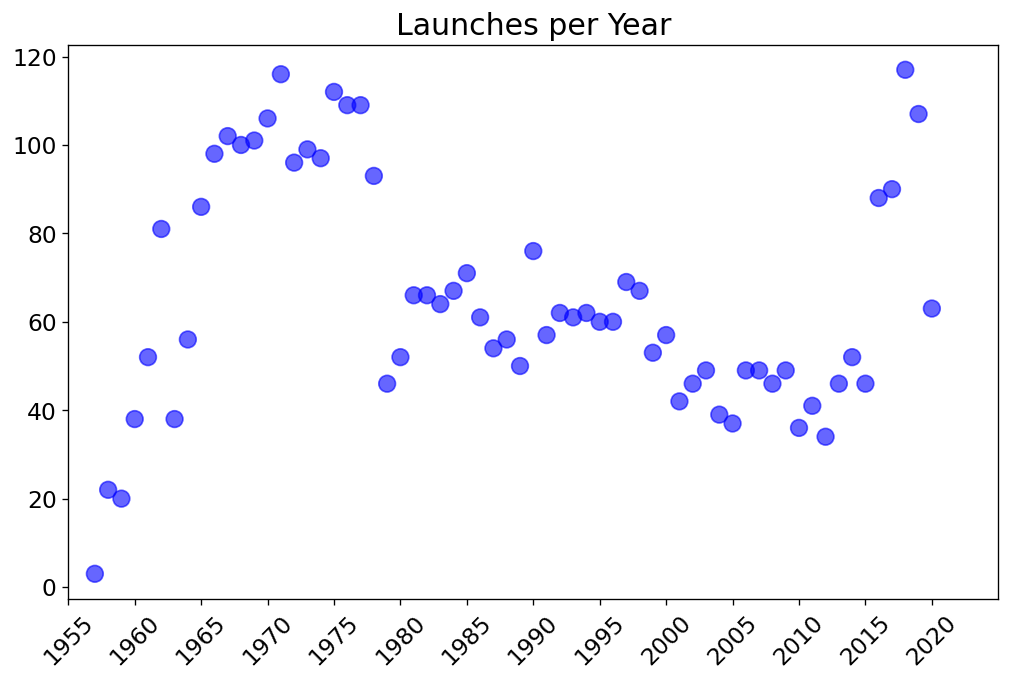

In [43]:
plt.figure(figsize=(10,6), dpi=120)
plt.title('Launches per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1950, 2025, step=5), 
           fontsize=14, 
           rotation=45)
plt.xlim(1955, 2025)

plt.scatter(lauches_per_year.index, lauches_per_year.values, color="blue", linestyle="", marker="o", alpha=0.6, s=100)

plt.show()


# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [44]:
df_data["Month_Year"] = df_data.Date.dt.strftime('%Y-%m')
lauches_per_month_y = df_data.Month_Year.value_counts().sort_index(ascending=True)
lauches_per_month_y_rw = lauches_per_month_y.rolling(12).mean()

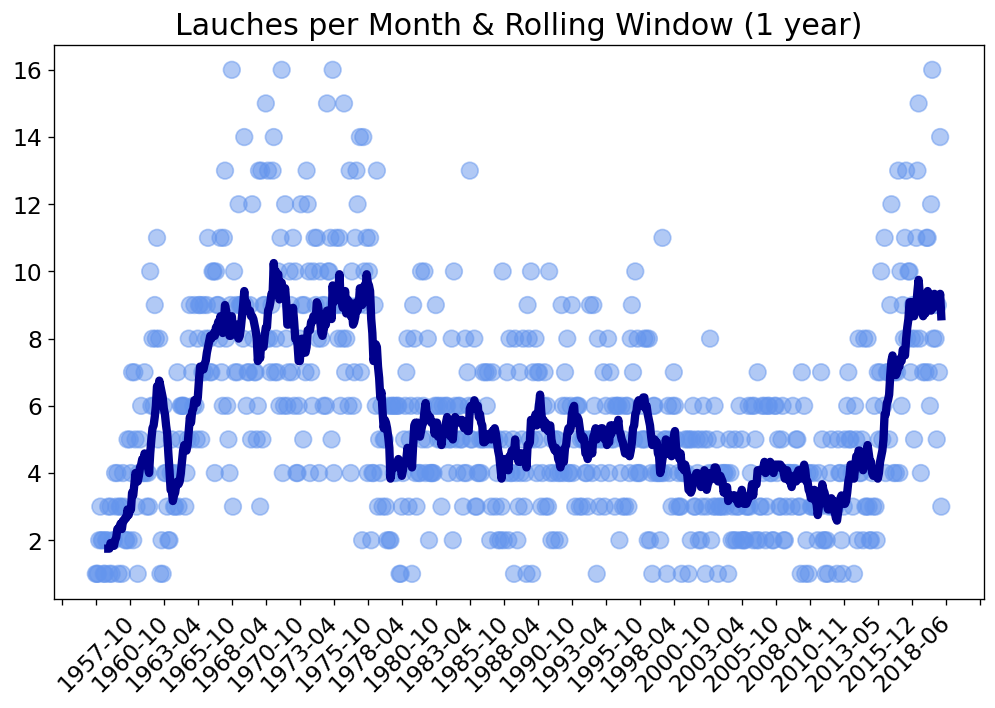

In [45]:
plt.figure(figsize=(10, 6), dpi=120)
plt.title('Lauches per Month & Rolling Window (1 year)', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()

ax.scatter(lauches_per_month_y.index, lauches_per_month_y.values,
           color="cornflowerblue", linestyle="", marker="o", alpha=0.5, s=100)
ax.plot(lauches_per_month_y_rw.index, lauches_per_month_y_rw.values,
        color="darkblue", linewidth=5)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(
    integer=True, prune='both', nbins=((2020-1956)/2)))

plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [46]:
df_data["Month"] = df_data.Date.dt.month
lauches_per_month = df_data.Month.value_counts()

In [47]:
fig = px.bar(lauches_per_month, y=lauches_per_month.values, x=lauches_per_month.index,
             title='Historicaly the Most Popular Month for Launch is December', orientation='v',  width=1200, height=700)

fig.update_layout(xaxis_title='Month',
                  yaxis_title='Number of Launches',
                  yaxis_range=[200, 450])

fig.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [48]:
launch_price_per_month = df_data.groupby(
    "Month_Year", as_index=False).agg({"Price": pd.Series.mean})
launch_price_per_month.set_index("Month_Year", inplace=True)
launch_price_per_month


,Price
Month_Year,
1957-10,NaN
1957-11,NaN
1957-12,NaN
1958-02,NaN
1958-03,NaN
...,...
2020-04,"44,037,500.00"
2020-05,"54,925,000.00"
2020-06,"35,314,285.71"


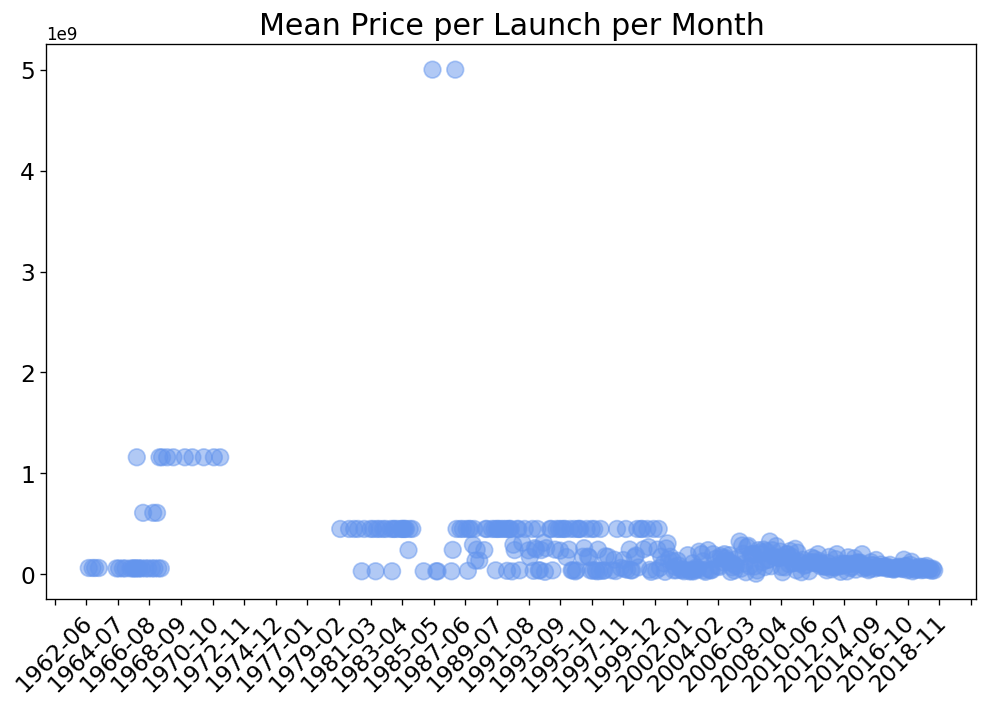

In [49]:
plt.figure(figsize=(10, 6), dpi=120)
plt.title("Mean Price per Launch per Month", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()

ax.scatter(launch_price_per_month.index, launch_price_per_month.values,
           color="cornflowerblue", linestyle="", marker="o", alpha=0.5, s=100)
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(
    integer=True, prune='both', nbins=((2020-1956)/2)))

plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [50]:
top_10_organizations_list = top_20_organizations.tail(10).index.to_list()
launches_per_year_to_organization = pd.DataFrame(columns=top_10_organizations_list)
launches_per_year_to_organization.index.name = "Year"

for i_year in range(int(df_data.Year.min()), int(df_data.Year.max())+1):
    df_temp = df_data[df_data.Year == i_year]
    n_missions_organization = df_temp.groupby("Organisation").Year.value_counts()
    n_missions_organization = n_missions_organization.unstack()
    n_missions_organization = n_missions_organization.T
    n_missions_organization = n_missions_organization.drop(columns=[col for col in n_missions_organization.columns if col not in top_10_organizations_list])

    missing_columns = [col for col in top_10_organizations_list if col not in n_missions_organization.columns]
    for col in missing_columns:
        n_missions_organization[col] = 0

    n_missions_organization.index.name = 'Year'

    launches_per_year_to_organization = pd.concat([launches_per_year_to_organization, n_missions_organization])

launches_per_year_to_organization.sort_index(inplace=True)

<Figure size 1000x600 with 0 Axes>

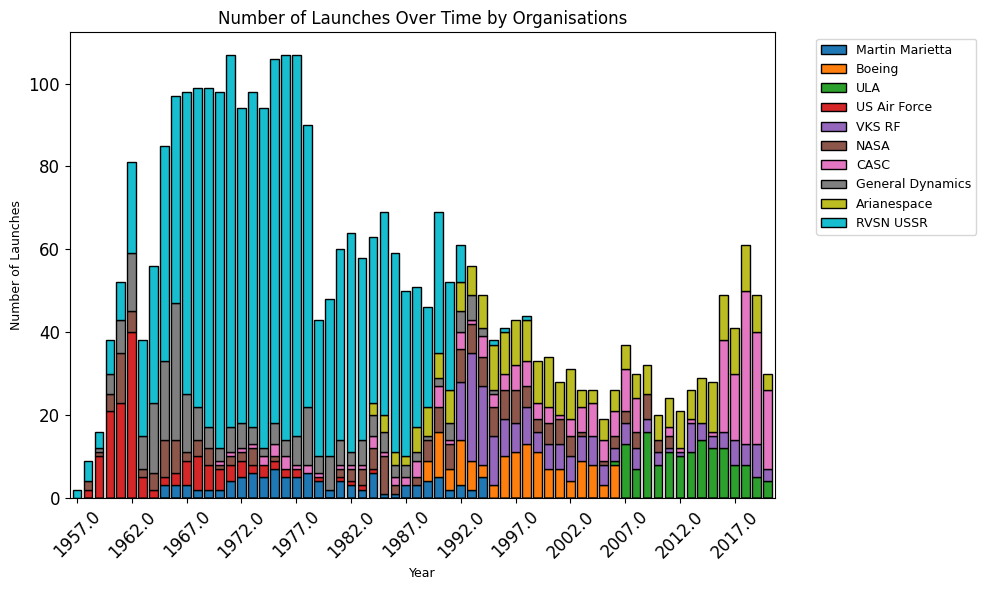

In [51]:
plt.figure(figsize=(10, 6))

launches_per_year_to_organization.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    cmap='tab10',
    width=0.8,
    edgecolor='black'
)

plt.title('Number of Launches Over Time by Organisations', fontsize=12)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Number of Launches', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(5))
plt.tight_layout()

plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [52]:
df_data_CW = df_data.copy()
df_data_CW.loc[df_data_CW["Country_Code"] == "RUS", "Country_Code"] = "USSR"
df_data_CW.loc[df_data_CW["Country_Code"] == "KAZ", "Country_Code"] = "USSR"
df_data_CW = df_data_CW[df_data_CW.Year <= 1991]
df_data_CW = df_data_CW[df_data_CW.Country_Code.isin(["USA", "USSR"])]

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [53]:
rocket_by_country_CW = df_data_CW.groupby("Country_Code").agg({"Year": pd.Series.count})
rocket_by_country_CW.rename(columns={"Year": "Number of Launches"}, inplace=True)
rocket_by_country_CW

,Number of Launches
Country_Code,
USA,644
USSR,1709


In [54]:
fig = px.pie(rocket_by_country_CW, names=rocket_by_country_CW.index, values="Number of Launches", color=rocket_by_country_CW.index, title="USSR Vs USA<br><sup>Number of Launches During Cold War.</sup>", 
             width=800, height=600, hole=.5, color_discrete_map={"USA": "blue", "USSR": "red"})
fig.update_layout(font={"size": 16})
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [55]:
countries = ["USA", "USSR"]
launches_per_year_CW = pd.DataFrame(columns=countries)
launches_per_year_CW.index.name = "Year"

for i_year in range(int(df_data_CW.Year.min()), int(df_data_CW.Year.max())+1):
    df_temp = df_data_CW[df_data_CW.Year == i_year]
    n_missions_CW = df_temp.groupby("Country_Code").Year.value_counts()
    n_missions_CW = n_missions_CW.unstack()
    n_missions_CW = n_missions_CW.T
    n_missions_CW = n_missions_CW.drop(columns=[col for col in n_missions_CW.columns if col not in countries])

    missing_columns = [col for col in countries if col not in n_missions_CW.columns]
    for col in missing_columns:
        n_missions_CW[col] = 0

    n_missions_CW.index.name = 'Year'

    launches_per_year_CW = pd.concat([launches_per_year_CW, n_missions_CW])

cum_launches_per_year_CW = launches_per_year_CW.cumsum(axis=0)

<Figure size 1000x600 with 0 Axes>

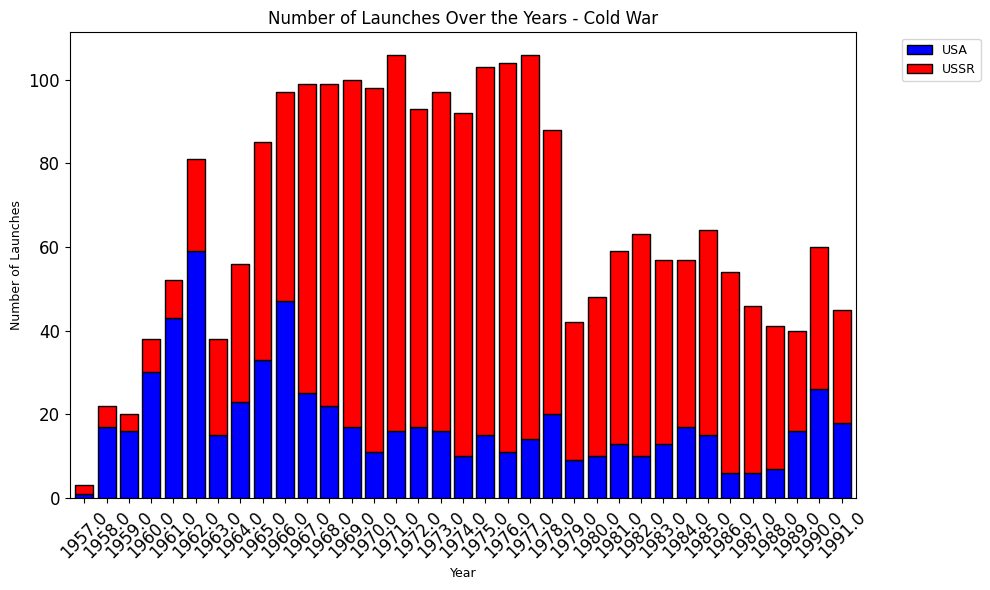

In [56]:
plt.figure(figsize=(10, 6))

launches_per_year_CW.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#0000ff', '#ff0000'],
    width=0.8,
    edgecolor='black'
)

plt.title('Number of Launches Over the Years - Cold War', fontsize=12)
plt.xlabel('Year', fontsize=9)
plt.ylabel('Number of Launches', fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [57]:
fig = px.line(cum_launches_per_year_CW, x=cum_launches_per_year_CW.index, y = cum_launches_per_year_CW.columns)
 
fig.update_layout(title='Number of Launches Over Time - Cold War',
                   xaxis_title='Year',
                   yaxis_title='Number')

fig.show()

## Chart the Total Number of Mission Failures Year on Year.

In [58]:
df_data_failures = df_data[df_data.Mission_Status != "Success"]
failures_per_year = df_data_failures.groupby("Year", as_index=True).agg({"Mission_Status": pd.Series.count})

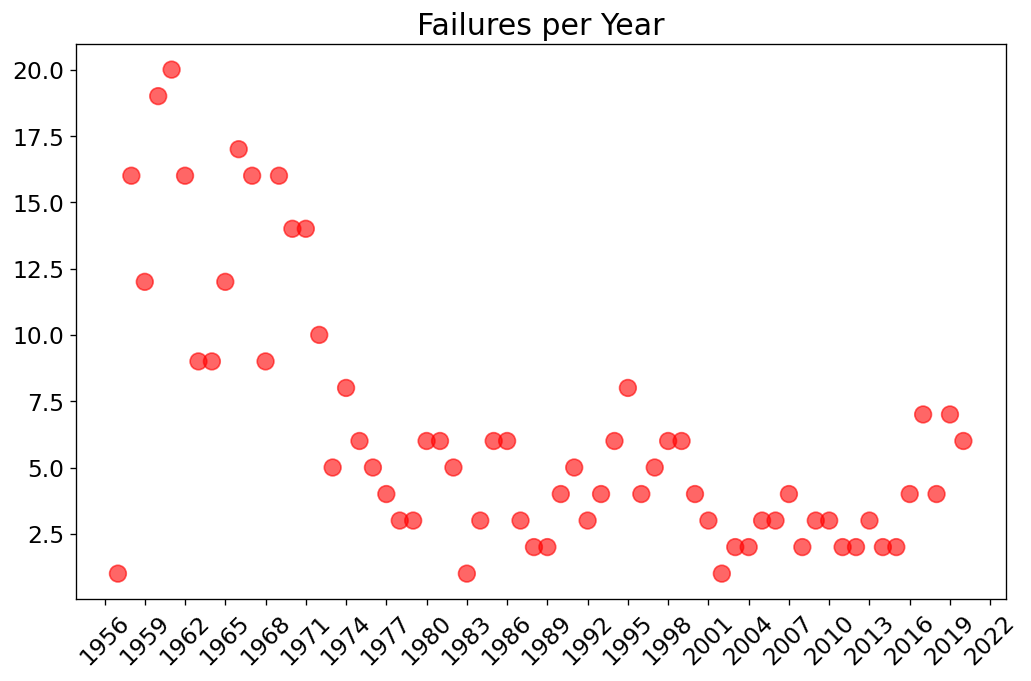

In [59]:
plt.figure(figsize=(10, 6), dpi=120)
plt.title('Failures per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()

ax.scatter(failures_per_year.index, failures_per_year.values,
           color="red", linestyle="", marker="o", alpha=0.6, s=100)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(
    integer=True, prune='both', nbins=((2020-1956)/2)))

plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [60]:
missions_per_year = df_data.groupby("Year", as_index=True).agg({"Mission_Status": pd.Series.count})
failures_per_year_perc = failures_per_year.div(missions_per_year, fill_value=0)

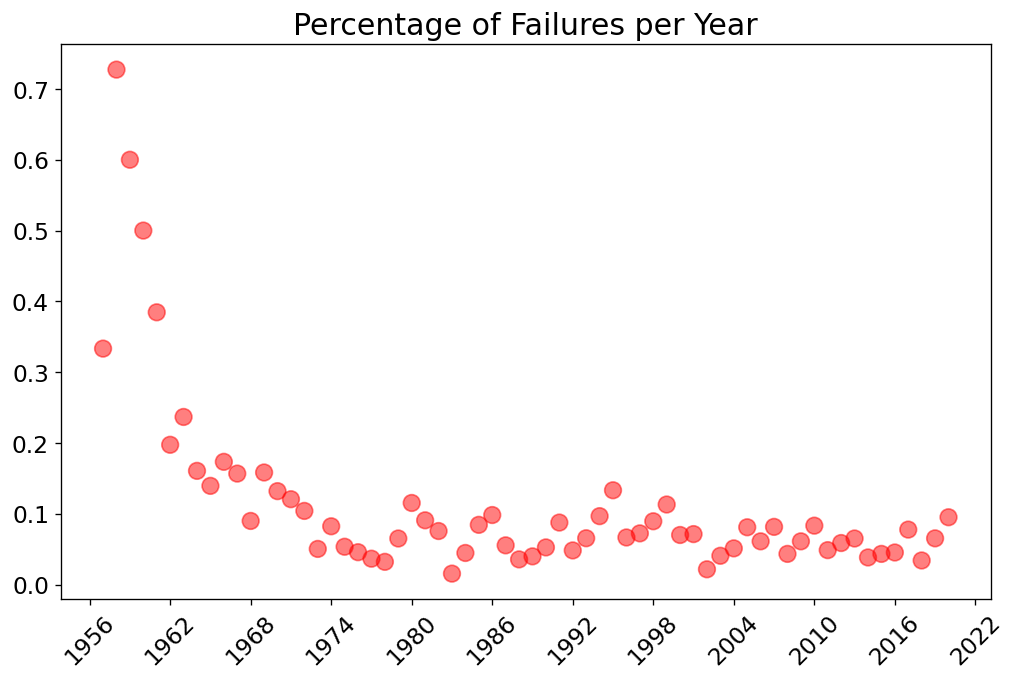

In [61]:
plt.figure(figsize=(10, 6), dpi=120)
plt.title('Percentage of Failures per Year', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax = plt.gca()

ax.scatter(failures_per_year_perc.index, failures_per_year_perc.values,
           color="red", linestyle="", marker="o", alpha=0.5, s=100)

ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(
    integer=True, prune='both', nbins=((2020-1956)/5)))

plt.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [62]:
countries_list = df_data.Country_Code.unique().tolist()
launches_per_year_countries = pd.DataFrame(columns=countries_list)
launches_per_year_countries.index.name = "Year"

for i_year in range(int(df_data.Year.min()), int(df_data.Year.max())+1):
    df_temp = df_data[df_data.Year == i_year]
    n_missions_countries = df_temp.groupby("Country_Code").Year.value_counts()
    n_missions_countries = n_missions_countries.unstack()
    n_missions_countries = n_missions_countries.T
    n_missions_countries = n_missions_countries.drop(columns=[col for col in n_missions_countries.columns if col not in countries_list])

    missing_columns = [col for col in countries_list if col not in n_missions_countries.columns]
    for col in missing_columns:
        n_missions_countries[col] = 0

    n_missions_countries.index.name = 'Year'

    launches_per_year_countries = pd.concat([launches_per_year_countries, n_missions_countries])

cum_launches_per_year_countries = launches_per_year_countries.cumsum(axis=0)

last_row = cum_launches_per_year_countries.iloc[-1]
columns_to_keep = last_row[last_row >= 50].index
cum_launches_per_year_countries = cum_launches_per_year_countries[columns_to_keep]


In [63]:
fig = px.line(cum_launches_per_year_countries, x=cum_launches_per_year_countries.index, y=cum_launches_per_year_countries.columns)

fig.update_layout(title='Cumulative Number of Launches Over Time by Country',
                  xaxis_title='Year',
                  yaxis_title='Number of Launches')

fig.show()

In [64]:
#Now let's to the same only for the successful launches.
df_data_success = df_data[df_data.Mission_Status == "Success"]
success_launches_per_year_countries = pd.DataFrame(columns=countries_list)
success_launches_per_year_countries.index.name = "Year"

for i_year in range(int(df_data_success.Year.min()), int(df_data_success.Year.max())+1):
    df_temp = df_data_success[df_data_success.Year == i_year]
    n_success_missions_countries = df_temp.groupby("Country_Code").Year.value_counts()
    n_success_missions_countries = n_success_missions_countries.unstack()
    n_success_missions_countries = n_success_missions_countries.T
    n_success_missions_countries = n_success_missions_countries.drop(columns=[col for col in n_success_missions_countries.columns if col not in countries_list])

    missing_columns = [col for col in countries_list if col not in n_success_missions_countries.columns]
    for col in missing_columns:
        n_success_missions_countries[col] = 0

    n_success_missions_countries.index.name = 'Year'

    success_launches_per_year_countries = pd.concat([success_launches_per_year_countries, n_success_missions_countries])

cum_launches_per_year_countries = cum_launches_per_year_countries.fillna(0)
cum_success_launches_per_year_countries = success_launches_per_year_countries.cumsum(axis=0)
last_row = cum_success_launches_per_year_countries.iloc[-1]
columns_to_keep = last_row[last_row >= 50].index
cum_success_launches_per_year_countries = cum_success_launches_per_year_countries[columns_to_keep]


C:\Users\matheus\AppData\Local\Temp\ipykernel_7284\3917095425.py:21: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [65]:
fig = px.line(cum_success_launches_per_year_countries, x=cum_success_launches_per_year_countries.index, y=cum_success_launches_per_year_countries.columns)

fig.update_layout(title='Cumulative Number of Launches Over Time by Country',
                  xaxis_title='Year',
                  yaxis_title='Number of Launches')

fig.show()

In [66]:
top_country_per_year = pd.DataFrame(columns=["total", "success"])

top_country_per_year['total'] = cum_launches_per_year_countries.idxmax(axis=1)
top_country_per_year['success'] = cum_success_launches_per_year_countries.idxmax(axis=1)

#It seams that during the early 70's the USA launches were not that reliable.
top_country_per_year[top_country_per_year["total"] != top_country_per_year["success"]]

,total,success
Year,,
"1,972.00",USA,RUS
"1,973.00",USA,RUS


# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [67]:
top_10_organizations_list = top_20_organizations.tail(10).index.to_list()
launches_per_year_to_organization = pd.DataFrame(columns=top_10_organizations_list)
launches_per_year_to_organization.index.name = "Year"

for i_year in range(int(df_data.Year.min()), int(df_data.Year.max())+1):
    df_temp = df_data[df_data.Year == i_year]
    n_missions_organization = df_temp.groupby("Organisation").Year.value_counts()
    n_missions_organization = n_missions_organization.unstack()
    n_missions_organization = n_missions_organization.T
    n_missions_organization = n_missions_organization.drop(columns=[col for col in n_missions_organization.columns if col not in top_10_organizations_list])

    missing_columns = [col for col in top_10_organizations_list if col not in n_missions_organization.columns]
    for col in missing_columns:
        n_missions_organization[col] = 0

    n_missions_organization.index.name = 'Year'

    launches_per_year_to_organization = pd.concat([launches_per_year_to_organization, n_missions_organization])

cum_launches_per_year_to_organization = launches_per_year_to_organization.cumsum(axis=0)

In [68]:
fig = px.line(cum_launches_per_year_to_organization, x=cum_launches_per_year_to_organization.index, y = cum_launches_per_year_to_organization.columns)
 
fig.update_layout(title="Number of Launches Over Time by Organisation",
                   xaxis_title="Year",
                   yaxis_title="Number of Launches")

fig.show()

In [69]:
#As we can see RVSN USSR is a 'outlier', now let's see the graph removing this organization.
cum_launches_per_year_to_organization_ex_rvsn = cum_launches_per_year_to_organization.drop("RVSN USSR",axis=1)
fig = px.line(cum_launches_per_year_to_organization_ex_rvsn, x=cum_launches_per_year_to_organization_ex_rvsn.index, y = cum_launches_per_year_to_organization_ex_rvsn.columns)
 
fig.update_layout(title='Number of Launches Over Time',
                   xaxis_title='Year',
                   yaxis_title='Number')

fig.show()